# The false discovery rate

In [2]:
library(ISLR2)

Now we perform hypothesis tests for all 2,000 fund managers in the `Fund` dataset. We perform a one-sample t-test of $H_{0j} : \mu_j = 0$, which states that the jth fund manager's mean return is zero.

In [3]:
fund.pvalues <- rep(0, 2000)
for (i in 1:2000)
    fund.pvalues[i] <- t.test(Fund[,i], mu = 0)$p.value

There are far too many managers to consider trying to control the FWER. Instead, we focus on controlling the FDR: that is, the expected fraction of rejected null hypotheses that are actually false positives. The `p.adjust()` function can be used to carry out the Benjamini-Hochberg procedure.

In [4]:
q.values.BH <- p.adjust(fund.pvalues, method = "BH")
q.values.BH[1:10]

[1] 0.08988921 0.99149100 0.12211561 0.92342997 0.95603587 0.07513802
 [7] 0.07670150 0.07513802 0.07513802 0.07513802

The q-values output by the Benjamini-Hochberg procedure can be interpreted as the smallest FDR threshold at which we would reject a particular null hypothesis. FOr instance, a q-value of $0.1$ indicates that we can reject the corresponding null hypothesis at an FDR of $10\%$ or greater, but that we cannot reject the null hypothesis at an FDR below $10\%$.

If we control the FDR at $10\%$, then for how many of the fund managers can we reject $H_{0j} : \mu_j = 0$?

In [5]:
sum(q.values.BH <= .1)

[1] 146

We find that 146 of the 2,000 fund managers have a q-value below $0.1$; therefore, we are able to conclude that 146 of the fund managers beat the market at an FDR of $10\%$. ONly about 15 ($10\%$ of 146) of these fund managers are likely to be false discoveries. By contrast, if we had instead used Bonferroni's method to control the FWER at level $\alpha = 0.1$, then we would have failed to reject any null hypotheses!

In [6]:
sum(fund.pvalues <= (0.1 / 2000))

[1] 0

Figure 13.6 displays the ordered p-values, $p(1) \le p(2) \le \cdots \le p(2000)$, for the `Fund` dataset, as well as the threshold for rejection by the Benjamini-Hochberg procedure. Recall that the Benjamini-Hochberg procedure searches for the largest p-value is less than or equal to $p(j)$. In the code below, we implement the Benjamini-Hochberg procedure ourselves, in order to illustrate how it works. We first order the p-values. We then identify all p-values that satisfy $p(j) < qj/m$ (`wh.ps`). FInally, `wh` indexes all p-values that are less than or equal to the largest p-value in `wh.ps`. Therefore, `wh` indexes the p-values rejected by the Benjamini-Hochberg procedure.

In [7]:
ps <- sort(fund.pvalues)
m <- length(fund.pvalues)
q <- 0.1
wh.ps <- which(ps < q * (1:m) / m)
if (length(wh.ps) > 0) {
    wh <- 1:max(wh.ps)
} else {
    wh <- numeric(0)
}

We now reproduce the middle panel of Figure 13.6.

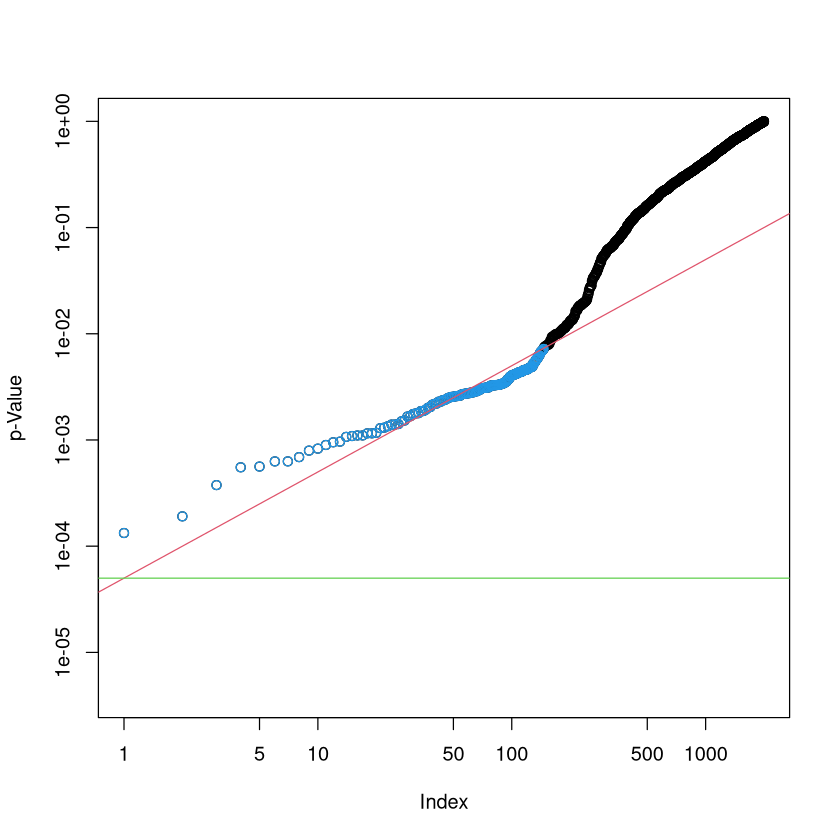

In [8]:
plot(ps, log = "xy", ylim = c(4e-6, 1), ylab = "p-Value",
     xlab = "Index", main = "")
points(wh, ps[wh], col = 4)
abline(a = 0, b = (q / m), col = 2, untf = TRUE)
abline(h = 0.1 / 2000, col = 3)